In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import scipy
from pyRF.circuit import Circuit
from pyRF.feedline import TimeDomainSolution
from pyRF.Experimental.examples.feedline_time_domain import Feedline
from pyRF.Experimental.examples.quarter_wave_resonator import QuarterWave
from pyRF.feedline import TimeDomainSolution
from pyRF.Experimental.examples.coupled_resonator_feedline import ResonatorFeedline

In [2]:
resonator_feedline_circuit = ResonatorFeedline('quarter_wave')
resonator_feedline_circuit.initialize()
R1 = resonator_feedline_circuit.resonator_dict['R1']
F1 = resonator_feedline_circuit.feedline_dict['F1']

In [3]:
R1.matrix_condition(60)

array([[-1.+0.j,  1.+0.j],
       [-1.+0.j, -1.+0.j]])

In [13]:
fr = R1.get_eigenvalue()
fr

6250000000.0

In [5]:
fr*1e-9

6.25

In [6]:
phi = R1.get_eigenfunction()
phi(0)

array(22.361-0.j)

c:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: >

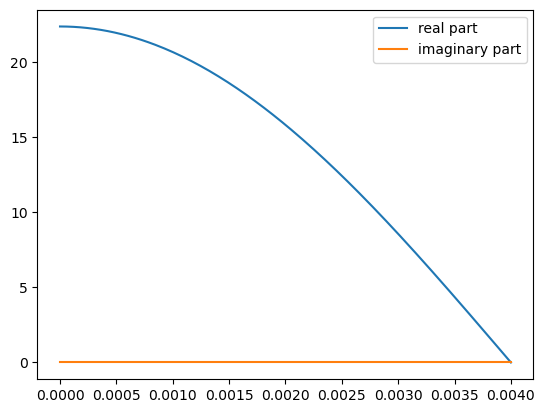

In [12]:
phi.plot()

In [7]:
f=6e9
feedline_a, feedline_b = F1.get_eigenfunction(f)

In [8]:
feedline_b(10e-3)

array(-0.809-0.588j)

c:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: >

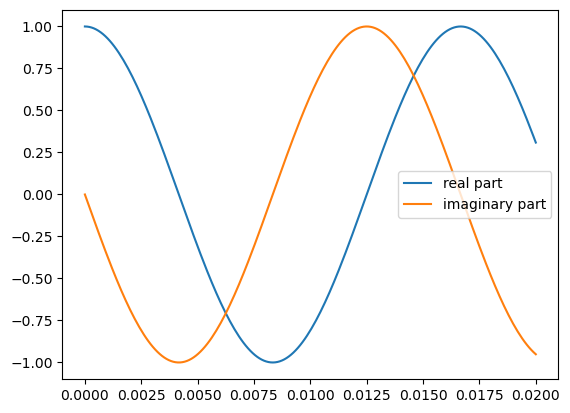

In [9]:
feedline_a.plot()

In [10]:
Z0=50
phi0=1e8
clengthinv = Z0*phi0
cap = 30e-15
ja = abs(feedline_a(10e-3)*cap*clengthinv*phi(0))
print(ja)

jb = abs(feedline_b(10e-3)*cap*clengthinv*phi(0))
print(jb)

0.003354101966249685
0.0033541019662496844


In [196]:


TDcoupling = ja*jb/phi0/(4*np.pi)
print(np.roots([1j*abs(TDcoupling),-1,0,fr**2]))
x1,x2,x3 = np.roots([1j*abs(TDcoupling)*(2*np.pi)**3,-1*(2*np.pi)**2,0,(2*np.pi*fr)**2])
print(x2,x3)

[ 0.00e+00-1.117e+14j -6.25e+09+1.749e+05j  6.25e+09+1.749e+05j]
(6249999517.202548+1098632.5409263887j) (-6249999517.202545+1098632.5409265195j)


In [53]:
print(np.imag(x2)-kappa_f/2)

-67.36275499872863


In [197]:
freqs = np.linspace(6.2e9,6.3e9,1000, dtype=np.complex128)
C = np.zeros_like(freqs)


for i,f in enumerate(freqs):

    feedline_a, feedline_b = F1.get_eigenfunction(f)
    ja = abs(feedline_a(10e-3)*cap*clengthinv*phi(0))
    jb = abs(feedline_b(10e-3)*cap*clengthinv*phi(0))
    TDcoupling = ja*jb/phi0*1j/(4*np.pi)
    drive_coupling = 1j*np.pi*ja/(2*phi0)*(2*np.pi*f)**3/(2*np.pi)
    C[i] = drive_coupling/((fr*2*np.pi)**2-(f*2*np.pi)**2 + 1j*abs(TDcoupling)*(2*np.pi*f)**3)


In [212]:
B = np.zeros_like(freqs)
A = np.zeros_like(freqs)


for i,f in enumerate(freqs):

    feedline_a, feedline_b = F1.get_eigenfunction(f)
    ja = abs(feedline_b(10e-3)*cap*clengthinv*phi(0))
    B[i] = ja*(f)**0*C[i]*1j/(np.pi)
    A[i] = 1j-ja*(f)**0*C[i]*1j/(np.pi)

c:\Users\thijs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


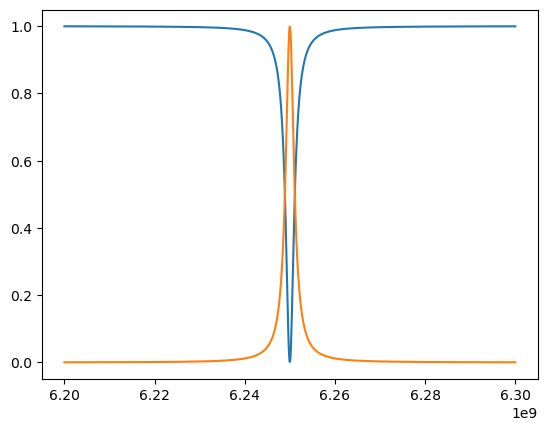

In [220]:
plt.plot(freqs,np.imag(A))
plt.plot(freqs,np.imag(B))

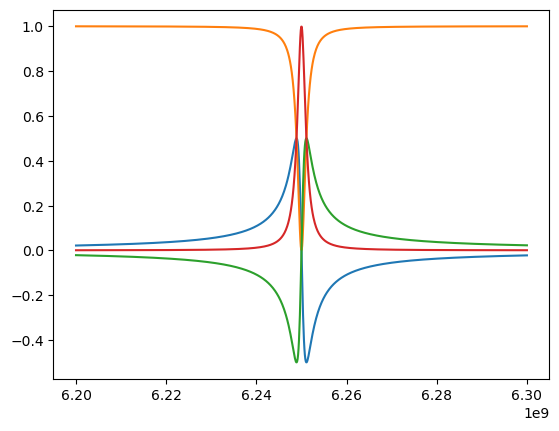

In [216]:
plt.plot(freqs, np.real(A))
plt.plot(freqs, np.imag(A))
plt.plot(freqs, np.real(B))
plt.plot(freqs, np.imag(B))


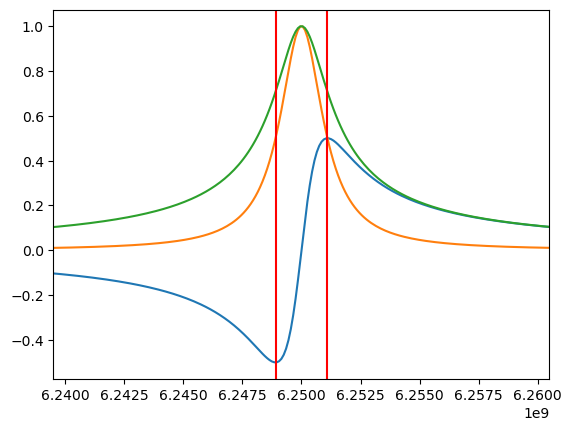

In [217]:
plt.plot(freqs, np.real(B))
plt.plot(freqs, np.imag(B))
plt.plot(freqs, np.abs(B))
dt=10.5e6
plt.xlim(fr-dt,fr+dt)
plt.axvline(fr-kappa_f/(4*np.pi), color='r')
plt.axvline(fr+kappa_f/(4*np.pi), color='r')
# plt.plot((fr-kappa_f/(2*np.pi)/2, fr+kappa_f/(2*np.pi)/2),(0.5,0.5))

plt.show()

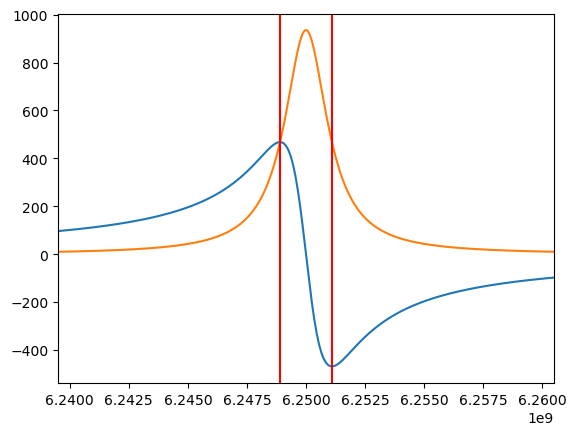

In [218]:
plt.plot(np.real(freqs),np.imag(C))
plt.plot(np.real(freqs),np.real(C))
plt.xlim(fr-dt,fr+dt)
plt.axvline(fr-kappa_f/(4*np.pi), color='r')
plt.axvline(fr+kappa_f/(4*np.pi), color='r')
plt.show()


In [62]:
coupling_quality_factor

452.7073936836134

In [23]:
line_impedance = 50
resonator_impedance = 4/np.pi * 50
coupling_quality_factor = 2 / (((2*np.pi*fr) ** 2) * (cap ** 2) * line_impedance * resonator_impedance)
coupling_quality_factor
kappa_f = fr / coupling_quality_factor
kappa_f/(2*np.pi)

2197265.625

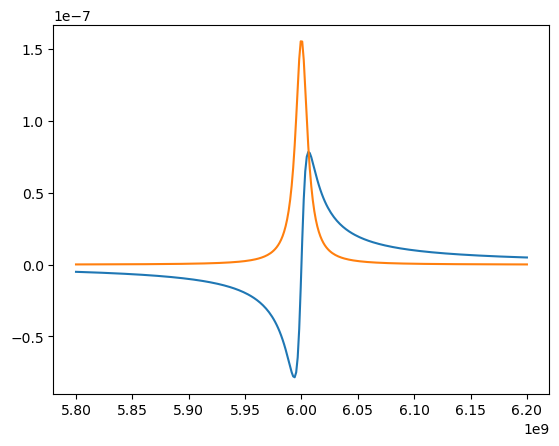

In [42]:
fvals = np.linspace(5.8e9,6.2e9, 300, dtype=np.complex128)
vals = 1/(fvals - x3)
plt.plot(fvals, vals.real)
plt.plot(fvals,vals.imag)
# plt.plot(fvals, np.abs(vals))

In [50]:
SD = np.array([[1, 0, ja],
               [0, 1, jb],
               [ja, jb, 1]])
f = fr*0.99#k*phi0*1.02
M = np.array([[f**2, 0, 0],
              [0, f**2, 0],
              [0, 0, fr**2]])*1e-18
A = scipy.linalg.inv(SD)@M
vecs = scipy.linalg.inv(SD)@np.eye(3)
eigval, eigvec = scipy.linalg.eig(A)
print(np.sqrt(eigval))
print(eigvec)

[6.253+0.j 6.188+0.j 6.184+0.j]
[[-0.156 -0.707  0.69 ]
 [-0.156  0.707  0.69 ]
 [ 0.975 -0.     0.217]]


In [42]:
np.array([[1], [0],[ 0]]).T @eigvec 

array([[-0.156, -0.707,  0.69 ]])

In [56]:

eigvec @ np.diag(np.array([1/(eigval[0]-eigval[1]), 0,0])) @ np.linalg.inv(eigvec)

array([[ 0.029+0.j,  0.029+0.j, -0.186+0.j],
       [ 0.029+0.j,  0.029+0.j, -0.186+0.j],
       [-0.182+0.j, -0.182+0.j,  1.162+0.j]])

In [59]:
eigvec @ np.diag(np.array([0, 1, 0])) @ np.linalg.inv(eigvec)


array([[ 0.5, -0.5,  0. ],
       [-0.5,  0.5, -0. ],
       [ 0. , -0. ,  0. ]])

In [58]:
eigvec @ np.diag(np.array([0, 0, 1/(eigval[2]-eigval[1])])) @ np.linalg.inv(eigvec)


array([[-11.828+0.j, -11.828+0.j,  -3.787+0.j],
       [-11.828+0.j, -11.828+0.j,  -3.787+0.j],
       [ -3.711+0.j,  -3.711+0.j,  -1.188+0.j]])

In [ ]:
eig[:,0]*np.diag()

In [29]:
eig, eigvec = scipy.linalg.eig((A-f**2*np.eye(3))*1e-18)

In [23]:
eig

array([0.   +0.j, 0.   +0.j, 1.608+0.j])

In [217]:
scipy.linalg.det((A-f**2*np.eye(3))*1e-18)

-9.615589874979584e-18

In [190]:
vecs

array([[ 1.   ,  0.   , -0.003],
       [ 0.   ,  1.   , -0.003],
       [-0.003, -0.003,  1.   ]])

In [185]:
(scipy.linalg.inv(eigvec))
# (z[:,0] + z[:,1])/np.sqrt(2)


array([[-0.5  , -0.5  ,  0.707],
       [-0.707,  0.707,  0.   ],
       [ 0.5  ,  0.5  ,  0.707]])

In [152]:
jflk = phi*c*clengthinv*psi
jresk = phi*c*clengthinv*psi

TDcoupling = jflk*jresk*np.pi**2/phi0*2

NameError: name 'c' is not defined

In [31]:
R1.mode_condition(fr*1e-8)

[3.879634666901867e-18, -2.081306613249581e-16]

In [25]:
F1.get_eigenfunction(60)